In [1]:
import pandas as pd
import numpy as np

def evaluate_results(df_real,df_predicted,pairs):
    results = []
    result_dfs = []
    for pair in pairs:
        real_index = pair[0]
        predicted_index = pair[1]
        real_row = df_real[df_real['nr.'] == real_index].values.flatten()
        predicted_row = df_predicted[df_predicted['nr.'] == predicted_index].values.flatten()
        print(real_row)
        print(predicted_row)
        mse = (real_row - predicted_row) ** 2
        relative_error = np.round((real_row - predicted_row)/ real_row * 100,2)
        unrelarive_error = np.round(real_row - predicted_row,2)
        abs_relative_error = np.abs(relative_error)
        abs_unrelarive_error = np.abs(unrelarive_error)
        rmse = np.sqrt(mse)

        results_df = pd.DataFrame({
            'real_values':real_row,
            'predicted_values':predicted_row,
            'MSE': mse,
            'RMSE': rmse,
            'Relative error [%]': relative_error,
            'Error': unrelarive_error,
            'Abs. Relative error [%]': abs_relative_error,
            'Abs. Error': abs_unrelarive_error,
        })

        results_df = pd.DataFrame(results_df.T)

        results_df.columns = df_real.columns

        result_dfs.append(results_df)

        results.append({
            'real_index': real_index,
            'predicted_index': predicted_index,
            'MSE_per_column': mse,
            'RMSE_per_column': rmse,
            'Relative error': relative_error
        })
    return results,result_dfs




In [2]:
import random

random_pairs = list(zip(random.sample(range(1, 40), 10),random.sample(range(1, 40), 10)))

In [3]:
df_real = pd.read_csv('test_results/real_results_raport_1_x_2.csv')
# df_predicted = pd.read_csv('test_results/result_raport.csv')
df_predicted = pd.read_csv('raport_generating_test/x/results/a1_raport.csv')

pairs_08_08_2025 = [
    [40,39],
    [46,37],
    [45,2],
    [34,29],
    [35,34],
    [31,18],
    [11,24],
    [13,9],
    [17,16],
    [1,20]
    ]


pairs_12_08_2025 = [
    [40,34],
    [46,39],
    [45,7],
    [34,35],
    [35,19],
    [31,18],
    [11,21],
    [13,2],
    [17,6],
    [1,29]
    ]



results,res_dfs = evaluate_results(df_real=df_real,df_predicted=df_predicted,pairs=pairs_12_08_2025)

FileNotFoundError: [Errno 2] No such file or directory: 'raport_generating_test/x/results/a1_raport.csv'

In [ ]:
results

[{'real_index': 40,
  'predicted_index': 34,
  'MSE_per_column': array([3.60000000e+01, 2.25000000e+00, 2.50000000e-01, 1.00000000e-02,
         0.00000000e+00, 7.39600000e-01, 5.35761196e-03, 3.36158291e-04,
         1.24322500e+02, 2.07659847e-03, 3.71813726e+02, 9.61000000e+00,
         4.22500000e+01, 6.88900000e+01, 4.56670168e+00, 1.04857600e+04,
         0.00000000e+00, 1.44000000e+00, 7.29000000e+00, 9.00000000e-02,
         1.68100000e+03, 7.74400000e+03, 1.49103637e+08]),
  'RMSE_per_column': array([6.00000000e+00, 1.50000000e+00, 5.00000000e-01, 1.00000000e-01,
         0.00000000e+00, 8.60000000e-01, 7.31957100e-02, 1.83346200e-02,
         1.11500000e+01, 4.55697100e-02, 1.92824720e+01, 3.10000000e+00,
         6.50000000e+00, 8.30000000e+00, 2.13698425e+00, 1.02400000e+02,
         0.00000000e+00, 1.20000000e+00, 2.70000000e+00, 3.00000000e-01,
         4.10000000e+01, 8.80000000e+01, 1.22108000e+04]),
  'Relative error': array([ 1.5000e+01,  7.9000e-01,  4.7000e-01,  5.3

In [ ]:
pd.set_option('display.max_columns', 100)
res_dfs[0]

,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,długośćmm,szerokośćmm,kąt,obwódmm,obwód_c.mm,średnica_fereta_hmm,średnica_fereta_vmm,średn._martinamm,średn._sitowamm,średnia_jaskrawość,r,g,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2
real_values,40.0,190.00,107.00,19.00,10.7,9.3000,9.526804,1.081665,129.0400,21.417886,19.889861,6.40,7.60,1.30,1.140175,234.10,98.9,144.40,161.40,132.00,42.00,100.0,1.228800e+04
predicted_values,34.0,188.50,106.50,18.90,10.7,8.4400,9.600000,1.100000,140.1900,21.463456,39.172334,9.50,1.10,9.60,3.277160,131.70,98.9,143.20,158.70,131.70,1.00,12.0,7.720000e+01
MSE,36.0,2.25,0.25,0.01,0.0,0.7396,0.005358,0.000336,124.3225,0.002077,371.813726,9.61,42.25,68.89,4.566702,10485.76,0.0,1.44,7.29,0.09,1681.00,7744.0,1.491036e+08
RMSE,6.0,1.50,0.50,0.10,0.0,0.8600,0.073196,0.018335,11.1500,0.045570,19.282472,3.10,6.50,8.30,2.136984,102.40,0.0,1.20,2.70,0.30,41.00,88.0,1.221080e+04
Relative error [%],15.0,0.79,0.47,0.53,0.0,9.2500,-0.770000,-1.700000,-8.6400,-0.210000,-96.950000,-48.44,85.53,-638.46,-187.430000,43.74,0.0,0.83,1.67,0.23,97.62,88.0,9.937000e+01
Error,6.0,1.50,0.50,0.10,0.0,0.8600,-0.070000,-0.020000,-11.1500,-0.050000,-19.280000,-3.10,6.50,-8.30,-2.140000,102.40,0.0,1.20,2.70,0.30,41.00,88.0,1.221080e+04
Abs. Relative error [%],15.0,0.79,0.47,0.53,0.0,9.2500,0.770000,1.700000,8.6400,0.210000,96.950000,48.44,85.53,638.46,187.430000,43.74,0.0,0.83,1.67,0.23,97.62,88.0,9.937000e+01
Abs. Error,6.0,1.50,0.50,0.10,0.0,0.8600,0.070000,0.020000,11.1500,0.050000,19.280000,3.10,6.50,8.30,2.140000,102.40,0.0,1.20,2.70,0.30,41.00,88.0,1.221080e+04


In [ ]:
def mean_from_all(res_dfs):
    # Stack into a 3D structure
    numeric_cols = res_dfs[0].select_dtypes(include='number').columns
    non_numeric_cols = res_dfs[0].columns.difference(numeric_cols)

    # Compute mean only for numeric columns
    numeric_means = pd.concat([df[numeric_cols] for df in res_dfs]) \
                      .groupby(level=0).mean()

    # Restore the non-numeric columns from the first df
    mean_df = pd.concat([res_dfs[0][non_numeric_cols], numeric_means], axis=1)

    # Preserve original index order
    mean_df = mean_df.loc[res_dfs[0].index]

    return mean_df

mean_df = mean_from_all(res_dfs)


In [ ]:
mean_df

,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,długośćmm,szerokośćmm,kąt,obwódmm,obwód_c.mm,średnica_fereta_hmm,średnica_fereta_vmm,średn._martinamm,średn._sitowamm,średnia_jaskrawość,r,g,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2
real_values,27.300,499.600,379.600,49.960,37.960,2.28900,2.300073,1.004030,79.09300,5.837151,5.476292,1.850,1.900,1.290,1.067294,226.210,105.010,151.590,164.380,138.410,42.00,100.00,1.228800e+04
predicted_values,21.000,499.050,379.550,49.920,37.980,1.91200,2.230000,1.010000,120.06700,5.812102,10.815678,2.190,1.020,2.230,1.372029,135.560,103.380,147.440,159.060,135.580,1.00,11.78,1.723000e+01
MSE,308.100,0.575,0.125,0.004,0.002,0.25793,0.040604,0.040638,3668.84886,0.365441,51.408309,0.996,4.384,6.954,0.482490,8452.039,195.071,352.057,293.318,287.919,1681.00,7797.27,1.505722e+08
RMSE,14.100,0.550,0.250,0.040,0.020,0.41500,0.144396,0.156786,48.24200,0.464721,5.339385,0.460,0.960,1.000,0.339652,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04
Relative error [%],-254.221,0.165,0.164,0.120,-0.055,6.07200,-0.249000,-15.957000,-100.65100,-13.703000,-126.602000,-10.721,16.924,-75.635,-39.207000,40.142,1.447,2.805,3.649,2.131,97.62,88.22,9.986000e+01
Error,6.300,0.550,0.050,0.040,-0.020,0.37700,0.069000,-0.005000,-40.97400,0.024000,-5.338000,-0.340,0.880,-0.940,-0.306000,90.650,1.630,4.150,5.320,2.830,41.00,88.22,1.227077e+04
Abs. Relative error [%],324.549,0.165,0.218,0.120,0.055,28.58400,13.527000,27.283000,105.44300,23.349000,126.602000,20.121,32.590,81.329,41.465000,40.142,8.223,7.641,6.883,7.773,97.62,88.22,9.986000e+01
Abs. Error,14.100,0.550,0.250,0.040,0.020,0.41500,0.145000,0.157000,48.24200,0.464000,5.338000,0.460,0.960,1.000,0.340000,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04


In [ ]:
mean_df

,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,długośćmm,szerokośćmm,kąt,obwódmm,obwód_c.mm,średnica_fereta_hmm,średnica_fereta_vmm,średn._martinamm,średn._sitowamm,średnia_jaskrawość,r,g,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2
real_values,27.300,499.600,379.600,49.960,37.960,2.28900,2.300073,1.004030,79.09300,5.837151,5.476292,1.850,1.900,1.290,1.067294,226.210,105.010,151.590,164.380,138.410,42.00,100.00,1.228800e+04
predicted_values,21.000,499.050,379.550,49.920,37.980,1.91200,2.230000,1.010000,120.06700,5.812102,10.815678,2.190,1.020,2.230,1.372029,135.560,103.380,147.440,159.060,135.580,1.00,11.78,1.723000e+01
MSE,308.100,0.575,0.125,0.004,0.002,0.25793,0.040604,0.040638,3668.84886,0.365441,51.408309,0.996,4.384,6.954,0.482490,8452.039,195.071,352.057,293.318,287.919,1681.00,7797.27,1.505722e+08
RMSE,14.100,0.550,0.250,0.040,0.020,0.41500,0.144396,0.156786,48.24200,0.464721,5.339385,0.460,0.960,1.000,0.339652,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04
Relative error [%],-254.221,0.165,0.164,0.120,-0.055,6.07200,-0.249000,-15.957000,-100.65100,-13.703000,-126.602000,-10.721,16.924,-75.635,-39.207000,40.142,1.447,2.805,3.649,2.131,97.62,88.22,9.986000e+01
Error,6.300,0.550,0.050,0.040,-0.020,0.37700,0.069000,-0.005000,-40.97400,0.024000,-5.338000,-0.340,0.880,-0.940,-0.306000,90.650,1.630,4.150,5.320,2.830,41.00,88.22,1.227077e+04
Abs. Relative error [%],324.549,0.165,0.218,0.120,0.055,28.58400,13.527000,27.283000,105.44300,23.349000,126.602000,20.121,32.590,81.329,41.465000,40.142,8.223,7.641,6.883,7.773,97.62,88.22,9.986000e+01
Abs. Error,14.100,0.550,0.250,0.040,0.020,0.41500,0.145000,0.157000,48.24200,0.464000,5.338000,0.460,0.960,1.000,0.340000,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04


In [ ]:
mean_df


,nr.,xpix.,ypix.,xmm,ymm,powierzchniamm,długośćmm,szerokośćmm,kąt,obwódmm,obwód_c.mm,średnica_fereta_hmm,średnica_fereta_vmm,średn._martinamm,średn._sitowamm,średnia_jaskrawość,r,g,b,y,liczenie_obiektow_w,udzial_punktow,pole_obrazu_mm2
real_values,27.300,499.600,379.600,49.960,37.960,2.28900,2.300073,1.004030,79.09300,5.837151,5.476292,1.850,1.900,1.290,1.067294,226.210,105.010,151.590,164.380,138.410,42.00,100.00,1.228800e+04
predicted_values,21.000,499.050,379.550,49.920,37.980,1.91200,2.230000,1.010000,120.06700,5.812102,10.815678,2.190,1.020,2.230,1.372029,135.560,103.380,147.440,159.060,135.580,1.00,11.78,1.723000e+01
MSE,308.100,0.575,0.125,0.004,0.002,0.25793,0.040604,0.040638,3668.84886,0.365441,51.408309,0.996,4.384,6.954,0.482490,8452.039,195.071,352.057,293.318,287.919,1681.00,7797.27,1.505722e+08
RMSE,14.100,0.550,0.250,0.040,0.020,0.41500,0.144396,0.156786,48.24200,0.464721,5.339385,0.460,0.960,1.000,0.339652,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04
Relative error [%],-254.221,0.165,0.164,0.120,-0.055,6.07200,-0.249000,-15.957000,-100.65100,-13.703000,-126.602000,-10.721,16.924,-75.635,-39.207000,40.142,1.447,2.805,3.649,2.131,97.62,88.22,9.986000e+01
Error,6.300,0.550,0.050,0.040,-0.020,0.37700,0.069000,-0.005000,-40.97400,0.024000,-5.338000,-0.340,0.880,-0.940,-0.306000,90.650,1.630,4.150,5.320,2.830,41.00,88.22,1.227077e+04
Abs. Relative error [%],324.549,0.165,0.218,0.120,0.055,28.58400,13.527000,27.283000,105.44300,23.349000,126.602000,20.121,32.590,81.329,41.465000,40.142,8.223,7.641,6.883,7.773,97.62,88.22,9.986000e+01
Abs. Error,14.100,0.550,0.250,0.040,0.020,0.41500,0.145000,0.157000,48.24200,0.464000,5.338000,0.460,0.960,1.000,0.340000,90.650,8.870,11.550,10.840,10.750,41.00,88.22,1.227077e+04


<Axes: >

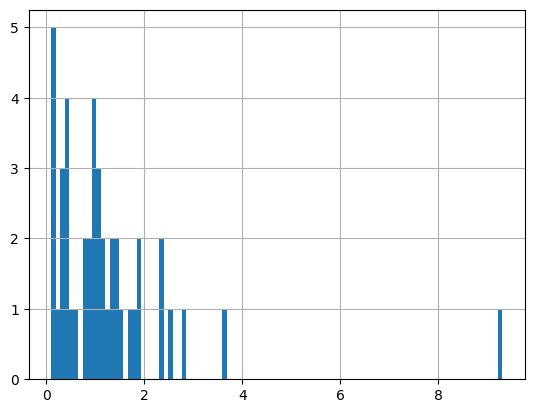

In [ ]:
df_real['powierzchniamm'].hist(bins=100)

<Axes: >

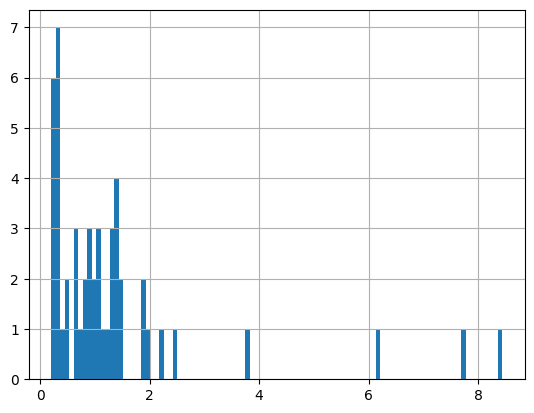

In [ ]:
df_predicted['powierzchniamm'].hist(bins=100)